# Wrapper Methods


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [10]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
lr = LogisticRegression(max_iter=10000)
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier()

# Recursive Feature Elimination

In [13]:
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
lr.fit(X_train_rfe, y_train)
rfe_accuracy = accuracy_score(y_test, lr.predict(X_test_rfe))

# Forward Selection

In [14]:
sfs_forward = SequentialFeatureSelector(lr, n_features_to_select=10, direction='forward')
sfs_forward.fit(X_train, y_train)
X_train_sfs_forward = sfs_forward.transform(X_train)
X_test_sfs_forward = sfs_forward.transform(X_test)
lr.fit(X_train_sfs_forward, y_train)
forward_accuracy = accuracy_score(y_test, lr.predict(X_test_sfs_forward))

# Backward Selection

In [15]:
sfs_backward = SequentialFeatureSelector(lr, n_features_to_select=10, direction='backward')
sfs_backward.fit(X_train, y_train)
X_train_sfs_backward = sfs_backward.transform(X_train)
X_test_sfs_backward = sfs_backward.transform(X_test)
lr.fit(X_train_sfs_backward, y_train)
backward_accuracy = accuracy_score(y_test, lr.predict(X_test_sfs_backward))

# Comparing Methods

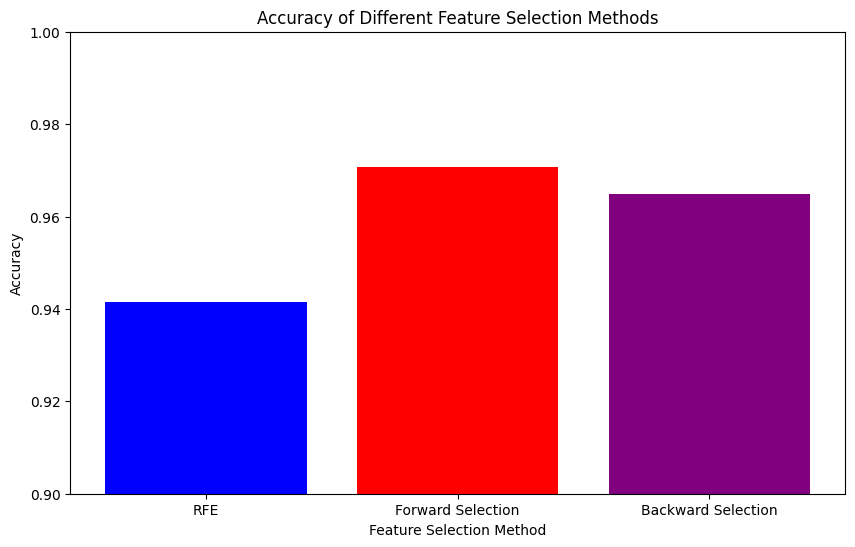

In [19]:
methods = ['RFE', 'Forward Selection', 'Backward Selection']
accuracies = [rfe_accuracy, forward_accuracy, backward_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color=['blue', 'red', 'purple'])
plt.xlabel('Feature Selection Method')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Feature Selection Methods')
plt.ylim(0.9, 1.0)
plt.show()